# マルコフ連載

実数値確率変数の列$X=(X_n)_{(n=0,1,2,...)}$と集合$B \subset R$に対して、
$$
P(X_{n+1} \in B | X_n,X_{n-1},...,X_1,X_0) = P(X_{n+1} \in B | X_n)
$$
となるとき、これを確率変数$X$の**マルコフ性**といい、このような性質を持つ$X$を**マルコフ連鎖**という。  
要するに次の遷移の確率が完全に現在の状態にのみ依存し、それ以前の状態には依存しないことをいう。  
$n$を時間の変数とみなすとき、$X_n$は時点$n$のおける何らかの"状態"を表すと考え、$X_n$がとる値の空間のことを**状態空間**ということがある。  
また、ある時点$n$から$m$ステップ先の確率を$m$ステップ**推移確率**といい、特に$p_m^{(n)}$が時点$n$によらないとき、マルコフ連鎖$X$は**斉時的**であるという。

In [1]:
# 具体例(天気の予測)
import numpy as np

states = ["sunny", "rainy"]
# S=sunny, R=rainnyでSSはsunny->sunnyとなる状態遷移
transitions = [["SS", "SR"],["RS", "RR"]]
# transitionsの各要素に対応する確率行列
T = [[0.9, 0.1],[0.5, 0.5]]

# 現在の天気
today_weather = "sunny"

# 予測したい日数
forcast_days = 5

# 現在の天気と上の遷移確率に基づいて推測
weather_list = []
n_days = 0
prob = 1.0
while n_days != forcast_days:
    if today_weather == "sunny":
        change = np.random.choice(transitions[0], p=T[0])
        if change == "SS":
            prob = prob * T[0][0]
            weather_list.append(states[0])
        else:
            prob = prob * T[0][1]
            weather_list.append(states[1])            
    else:
        change = np.random.choice(transitions[1], p=T[1])
        if change == "RS":
            prob = prob * T[1][0]
            weather_list.append(states[0])
        else:
            prob = prob * T[1][1]
            weather_list.append(states[1])        
    n_days+=1

print(f"天気予測結果：{weather_list}")

天気予測結果：['sunny', 'sunny', 'sunny', 'sunny', 'sunny']


# 離散的で有限な状態空間

応用上は、離散的な状態空間$S=\{x_1,x_2,...\}$をもつ斉時的マルコフ連鎖が重要である。  
特に状態空間$S$が有限個の要素からなるとき、$X$を**有限マルコフ連鎖**という。  
以下、一般性を失うことなく$S=\{x_1,x_2,...\}$とし、$X=(X_n)_{n=0,1,2,...}$を$S$上の斉時的有限マルコフ連鎖とする。  
このとき、状態$i$から状態$j$への$m$ステップ推移確率を
$$
p_m(i,j) = P(X_{n+m}=j | X_n=i), \quad i,j \in S
$$
とおく。これを$i,j$成分において作った$N \times N$行列
$$
Q(m) = 
\begin{pmatrix}
p_m(1,1) & p_m(1,2) & \dots & p_m(1,N) \\
p_m(2,1) & p_m(2,2) & \dots & p_m(2,N) \\
\vdots & \vdots & \ddots & \vdots \\
p_m(N,1) & p_m(N,2) & \dots & p_m(N,N)
\end{pmatrix}
$$
をマルコフ連鎖$X$の$m$ステップ**推移確率行列**という。  
また、任意の行列成分の和が$1$で、各成分が$0$以上となるものを**確率行列**という。

In [2]:
# 具体例(じゃんけんの推移確率行列(m=2))
transition_matrix = np.zeros([3,3])

# 0: rock, 1:scissors, 2:paper
transition_matrix[0,0] = 0.4
transition_matrix[0,1] = 0.3
transition_matrix[0,2] = 0.3
transition_matrix[1,0] = 0.6
transition_matrix[1,1] = 0.1
transition_matrix[1,2] = 0.3
transition_matrix[2,0] = 0.5
transition_matrix[2,1] = 0.2
transition_matrix[2,2] = 0.3
print(f"じゃんけんの推移確率行列：\n{transition_matrix}")

じゃんけんの推移確率行列：
[[0.4 0.3 0.3]
 [0.6 0.1 0.3]
 [0.5 0.2 0.3]]


# 推移確率の性質

$X_n$に対して、$p_n(k):=P(X_n=k)(k \in S)$と書くとき、
$$
π_n = (p_n(1), p_n(2),...,p_n(N))
$$
なる$N$次元ベクトルを時点$n$における$X$の**状態ベクトル**という。  
特に$π_0$を$X$の**初期分布**という。また $\sum_{k=1}^{N}p_n(k) = 1$となる。  
このように、成分の総和が$1$となるベクトルを**確率ベクトル**という。  
推移確率行列と状態確率ベクトルについては以下が成り立つ。  
(1)任意の自然数$l,m$に対して、
$$
Q(m+l) = Q(m)Q(l) = Q^mQ^l
$$
(2)任意の$n=0,1,2,...$に対して、
$$
π_n = π_0Q^n
$$

In [4]:
# 具体例(じゃんけんの推移確率行列)
m = 2
l = 3

m_transition_matrix = np.linalg.matrix_power(transition_matrix, m)
l_transition_matrix = np.linalg.matrix_power(transition_matrix, l)

# Q(m+l)
ml_transition_matrix = np.linalg.matrix_power(transition_matrix, m+l)
print(f"Q(m+l):\n{ml_transition_matrix}\n")

# Q(m)*Q(l) = (Q**m)*(Q**l)
ml_transition_matrix = np.dot(m_transition_matrix, l_transition_matrix)
print(f"Q(m)*Q(l) = Q^m*Q^l:\n{ml_transition_matrix}")

Q(m+l):
[[0.47488 0.22512 0.3    ]
 [0.4752  0.2248  0.3    ]
 [0.47504 0.22496 0.3    ]]

Q(m)*Q(l) = Q^m*Q^l:
[[0.47488 0.22512 0.3    ]
 [0.4752  0.2248  0.3    ]
 [0.47504 0.22496 0.3    ]]


# 定常分布

状態確率ベクトル$π_n$において$n \rightarrow  \infty$としたときの極値が存在する場合を考える。
$$
π:=\lim_{n \to  \infty} π_n 
$$
このとき両辺で$n \rightarrow  \infty$とすると、
$$
π = πQ
$$
が成り立つ。つまり、$π$は行列$Q$の固有値$1$に対する左固有ベクトルである。  
この意味は、マルコフ連鎖$X$の初期分布が$π$であったとすると、$1$回の推移によって状態変化しないということであり、長い時間のあと状態確率が$π$に収束してしまうと、そのあと何回推移してもその状態確率は変化しない。  
このような状態確率を$X$の**定常分布**といい、初期状態が定常分布なマルコフ連鎖のことを**定常マルコフ連鎖**という。

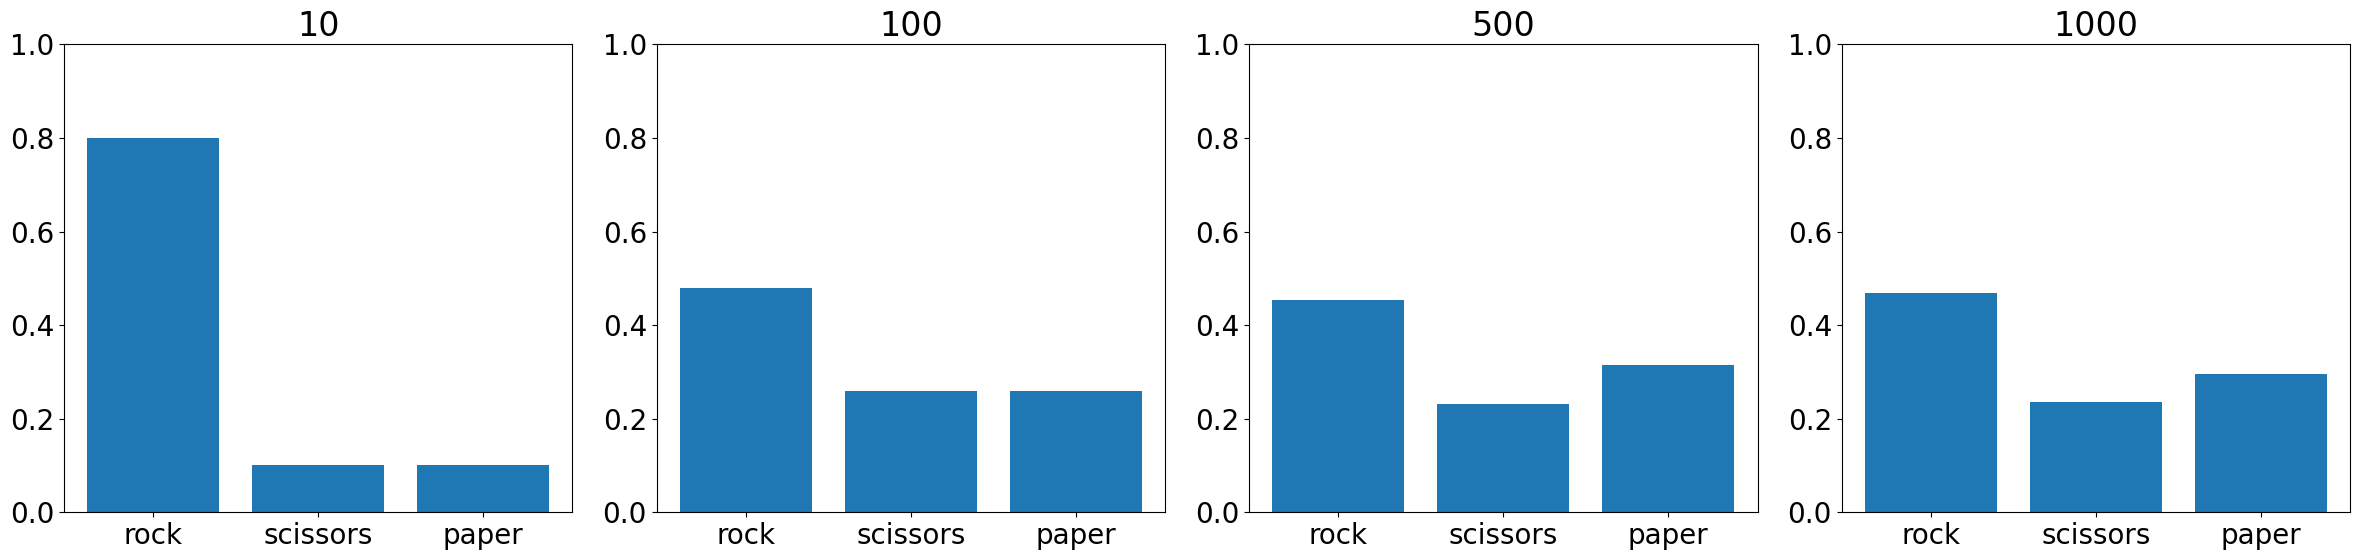

In [6]:
# 具体例(じゃんけん)
import matplotlib.pyplot as plt

transition_matrix = np.zeros([3,3])

# 0: rock, 1:scissors, 2:paper
transition_matrix[0,0] = 0.4
transition_matrix[0,1] = 0.3
transition_matrix[0,2] = 0.3
transition_matrix[1,0] = 0.6
transition_matrix[1,1] = 0.1
transition_matrix[1,2] = 0.3
transition_matrix[2,0] = 0.5
transition_matrix[2,1] = 0.2
transition_matrix[2,2] = 0.3

T = 1000 # 試行回数
np.random.seed(1)

# rockを初期状態として計算
h_init = 0
h_arr = [h_init]
h = h_init
for i in range(T):
    h = np.random.choice(3,1,p=transition_matrix[h,:])[0]
    h_arr.append(h)

# グラフに描画
hist1, bin1 = np.histogram(h_arr[:10],bins=np.arange(4),density=True)
hist2, bin2 = np.histogram(h_arr[:100],bins=np.arange(4),density=True)
hist3, bin3 = np.histogram(h_arr[:500],bins=np.arange(4),density=True)
hist4, bin4 = np.histogram(h_arr[:T],bins=np.arange(4),density=True)

plt.rcParams["font.size"] = 20
hands_label = ['rock','scissors','paper']

plt.figure(figsize=(24,6))
plt.subplot(1,4,1)
plt.bar(hands_label,hist1)
plt.ylim([0, 1])
plt.title('10')

plt.subplot(1,4,2)
plt.bar(hands_label,hist2)
plt.ylim([0, 1])
plt.title('100')

plt.subplot(1,4,3)
plt.bar(hands_label,hist3)
plt.ylim([0, 1])
plt.title('500')

plt.subplot(1,4,4)
plt.bar(hands_label,hist4)
plt.ylim([0, 1])
plt.title('1000')

plt.tight_layout()
plt.show()

回数を重ねるごとに分布の形の変化が小さくなっている=収束していることがわかる。  
十分に時間が経過したとき、とりあえずグーを出し続ければ勝つ確率が高いと言える。

定常分布は、固有値1の固有ベクトルの和が1となるように規格化するとを求められる。

In [7]:
import numpy.linalg as LA

w, v = LA.eig(transition_matrix.T)
idx = np.argmin(np.abs(np.real(w)-1))
w = np.real(v[:, idx]).T 
w /= np.sum(w)
print(f"定常分布π=:{w}")

定常分布π=:[0.475 0.225 0.3  ]


# 有限マルコフ連鎖のパラメータ推定

推移行列$Q$が未知パラメータ$\theta$に依存しているとする:
$$
Q_\theta = (p_\theta(i,j))_{(1 \leq i,j \leq N)}
$$
簡単のために、$\theta$は1次元のパラメータとする。  
$X$に関する観測データ$x_0,x_1,...,x_n$が与えられたとき、その実現確率は
$$
P(X_0=x_0, X_1=x_1,...,X_n=x_n) = p_0(x_0)\prod_{j=1}^{n}p_\theta(x_{j-1}, x_j) 
$$
と書ける。ただし、$p_0$はパラメータによらないとする。  
このとき対数尤度関数は、
$$
l_n(\theta) = \sum_{j=1}^{n} \log p_{\theta}(x_{j-1}, x_j)
$$
で与えられる。従って、$\theta$の最尤推定値$\hat{\theta}$は以下の尤度方程式の解として求められる:
$$
\frac{\partial}{\partial \theta} l_n(\hat{\theta})=0
$$
独立で同一分布に従うようなマルコフ連鎖が複数観測される場合も同様に上記で求められる。

最尤推定値(Θ):0.07


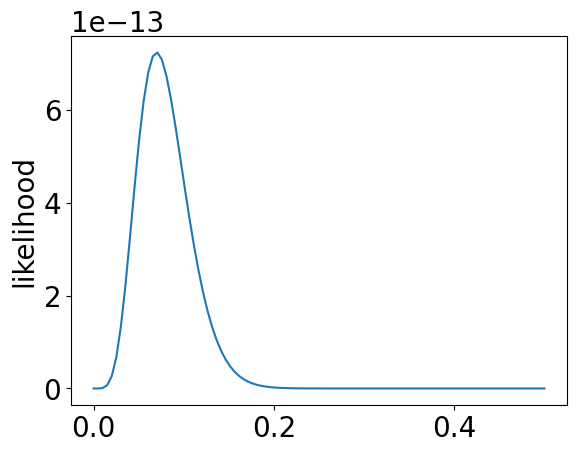

In [8]:
theta = 0 # 未知パラメータ

q_matrix = np.zeros([3,3])

# 0: A, 1:B, 2:C
def update_q_matrix(param):
    q_matrix[0,0] = 1-param
    q_matrix[0,1] = param
    q_matrix[0,2] = 0
    q_matrix[1,0] = 0.1
    q_matrix[1,1] = 0.9-param
    q_matrix[1,2] = param
    q_matrix[2,0] = 0
    q_matrix[2,1] = 0.1
    q_matrix[2,2] = 0.9

a_num = 30
b_num = 50
c_num =10

a2b = 5 # A→Bへの移動数
b2c = 1 # B→Cへの移動数

x_min = 0.0
x_max = 0.5
x_num = 100

x = np.linspace(x_min, x_max, x_num) # 0<Θ<0.5
retult_list = []
for theta in x:
    update_q_matrix(theta)
    result = \
        (q_matrix[0,0]**(a_num-a2b))*(q_matrix[0,1]**a2b)*\
        (q_matrix[1,1]**(b_num-b2c))*(q_matrix[1,2]**b2c)*\
        (q_matrix[2,2]**c_num)
    retult_list.append(result)

print(f"最尤推定値(Θ):{retult_list.index(max(retult_list))*x_max/x_num}")
plt.ylabel("likelihood")
plt.plot(x, retult_list)
plt.show()